In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## LOAD AND PRINT THE DATA FOR VALIDATION

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## COUNT THE NO. OF ROWS AND COLUMNS IN THE DATASET 

In [9]:
titanic.shape

(891, 15)

## SHOW THE COLUMNWISE STATISTICAL DATA 

In [11]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## GET THE COUNT OF THE NO. OF SURVIVORS 

In [18]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

## VISUALIZE THE COUNT OF THE NO. OF SURVIVORS 

<AxesSubplot:xlabel='survived', ylabel='count'>

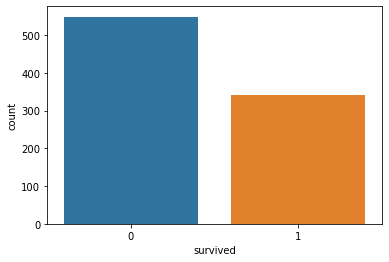

In [20]:
sns.countplot(titanic['survived'], label="count")

## VISUALIZE THE COUNT OF SURVIVORS FOR THE COLUMNS 'who', 'sex', 'pclass', 'sibsp', 'parch' and 'embarked' 

In [23]:
cols=['who','sex','pclass','sibsp','parch','embarked']

In [30]:
n_rows = 2 
n_cols = 2
#The subplot grid and the figure size of each graph.
#This returns a Figure(Fig) and Axes object(axs)

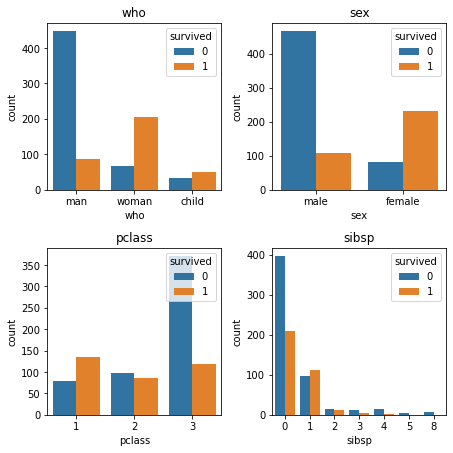

In [34]:
fig,axs= plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to go through the no. of columns
        ax=axs[r][c] #show where to position each subplot
        sns.countplot(titanic[cols[i]], hue= titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right')
    plt.tight_layout()

## look at the survival rate of sex

In [42]:

titanic.groupby('sex')["survived"].mean()  

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

## look at the survival rate by sex and class


In [46]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## look at the survival rate by sex and class visually 

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='sex'>

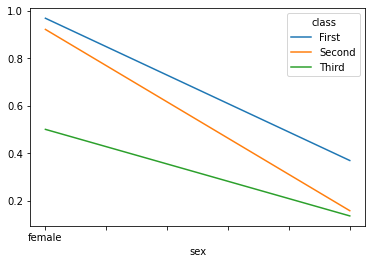

In [47]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

## plot the survival rate of each class

<AxesSubplot:xlabel='class', ylabel='survived'>

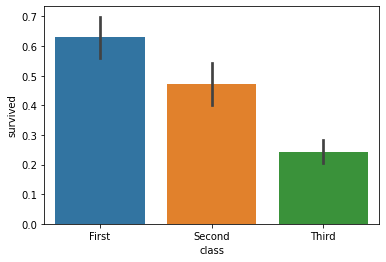

In [49]:
sns.barplot(x='class', y='survived', data= titanic)

## look at the survival rate by sex, age and class

In [51]:
age= pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived',['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

## plot the prices paid by each class

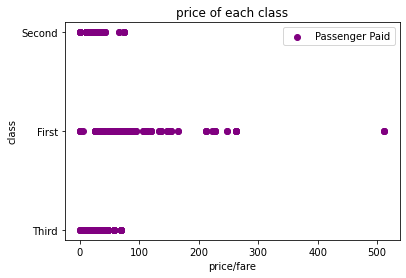

In [56]:
plt.scatter(titanic['fare'], titanic['class'], color='purple', label='Passenger Paid')
plt.ylabel('class')
plt.xlabel('price or fare')
plt.title('price of each class')
plt.legend()
plt.show()

## count the empty (Nan,NAN, na) values in each column 

In [58]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## look at all the values in each column and get a count for val in titanic:

In [67]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

## drop the redundant columns

In [79]:
titanic = titanic.drop(['deck', 'embark_town','alive','class','adult_male','who'],axis=1)

KeyError: "['deck' 'embark_town' 'alive' 'class' 'adult_male' 'who'] not found in axis"

In [74]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [77]:
titanic.shape

(891, 9)

## remove the rows with missing values 

In [80]:
titanic=titanic.dropna(subset=['embarked','age'])

## look at the columns that need to be transformed to numeric data for analysis 

In [81]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
alone          bool
dtype: object

## print the unique non-numeric values in those columns  

In [82]:
print(titanic['sex'].unique())

['male' 'female']


In [83]:
print(titanic['embarked'].unique())

['S' 'C' 'Q']


## encoding categorical data values (transformind object datatypes to integers)

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
labelencoder = LabelEncoder()

## encoding sex column 

In [87]:
titanic.iloc[:,2]=labelencoder.fit_transform(titanic.iloc[:,2].values)

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
#print(labelencoder.fit_transform(titanic.iloc[:,2].values)

## encode embarked column 

In [160]:
titanic.iloc[:,7]=labelencoder.fit_transform(titanic.iloc[:,7].values)

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [161]:
#print(labelencoder.fit_transform(titanic.iloc[:,7].values)

## print the NEW unique values in the columns 

In [162]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


## split the data into independent 'X' and dependent 'Y' variables 

In [163]:
X=titanic.iloc[:,1:8].values
Y=titanic.iloc[:,0].values

## split the data into 80% training set and 20% testing set

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=0)

## feature scaling (optional) 

In [165]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# CREATE A FUNCTION WITH MANY MACHINE LEARNING MODELS

In [166]:
def models(X_train, Y_train):
    
    # using logistic regression algorithm to the training set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
        ## using KNeighborsClassifier method of neighbors class to use Nearest Neighbor Algorithm 
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    ## using SVC method of SVM class to use Support Vector Machine algorithm 
    from sklearn.svm import SVC
    svc_lin = SVC (kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_rbf = SVC (kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    ## using GaussianNB method of naive_bayes class to use Naive Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB() 
    gauss.fit(X_train, Y_train)
    
    ## using Decision Tree Classifier of tree class to use Decision Tree Algorithm 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    ## using RandomForestClassifier method to ensemble class to use Random Forest Classification Algorithm 
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    ## print model accuracy on the training data 
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1] K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2] Support Vector Machine (linear classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3] Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4] Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

## get and train all the models 

In [167]:
model = models(X_train, Y_train)

[0] Logistic Regression Training Accuracy: 0.7978910369068541
[1] K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2] Support Vector Machine (linear classifier) Training Accuracy: 0.7768014059753954
[3] Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4] Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5] Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6] Random Forest Classifier Training Accuracy: 0.9753954305799648


## show the confusion matrix and accuracy for all the models on the testdata 

In [145]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

## extracting TN, FP, FN, TP

In [148]:
TN,FP,FN,TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
print(cm)
print('model[{}] Testing Accuracy = "{}"'.format(i,(TP+TN)/(TP+TN+FP+FN)))
print() #Print a new line

[[67 15]
 [13 48]]
model[6] Testing Accuracy = "0.8041958041958042"



## get the importance of the features 

In [170]:
forest = model[6]
importances= pd.DataFrame({'feature':titanic.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_, 3)})
importances= importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


## visualize the importance 

<AxesSubplot:xlabel='feature'>

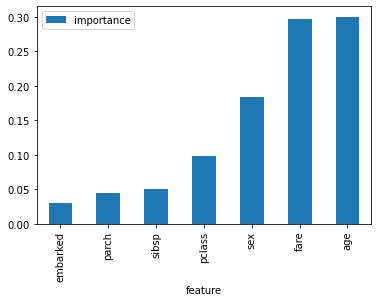

In [169]:
importances.plot.bar()

## print prediction of RandomForestClassifier Model

In [157]:
pred = model[6].predict(X_test)

## print a space 

In [158]:
print()

## print the actual values 

In [159]:
print(Y_test)

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


# || TESTING NEW DATA ||

In [189]:
my_survival=[[1, 1, 22, 1, 0, 100, 0]]
#where, 
#pclass=1
#sex=male
#age=22
#sibsp=1
#parch=0
#fare=100
#embarked=Cherbourg

## print prediction of random classifier model


In [179]:
pred=model[6].predict(my_survival)
print(pred)

[1]


In [190]:
if pred == 0:
    print('Oh no! you apparently died')
else:
    print('Nice! you escaped!')

Nice! you escaped!
